<a href="https://colab.research.google.com/github/Tagore-7/Neural_Networks_AK/blob/main/Makwmore_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
### read all the words(names)
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [7]:
len(words)

32033

In [8]:
### build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set("".join(words))))
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [9]:
stoi = {s: i+1 for i, s in enumerate(chars)}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [10]:
stoi["."] = 0
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [11]:
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [12]:
### building the dataset
block_size = 3 ### context length = how many characters are we taking to predict the next one
X, Y = [], [] ### X - inputs to the neural net, Y - labels of the inputs (examples in the X)

for w in words: ### let's do it for first 5 words
  # print(w)
  context = [0] * block_size
  # print(context)
  for ch in w + ".":
    # print(ch)
    ix = stoi[ch]
    # print(ix)
    X.append(context)
    # print(len(X))
    # print(context)
    Y.append(ix)
    # print(Y)
    # print(itos[ix])
    # print("".join(itos[i] for i in context), "----->" , itos[ix])
    context = context[1:] + [ix] ### crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [13]:
C = torch.randn((27,2))
C

tensor([[-0.1835, -1.3502],
        [ 0.0710,  1.8949],
        [ 0.0620,  0.6755],
        [ 0.8837, -1.8082],
        [ 0.2160,  2.3610],
        [-0.5822, -0.6515],
        [-0.7781,  0.1038],
        [-0.6788,  0.3405],
        [-1.1582, -1.4285],
        [-0.2916, -0.3734],
        [-0.3193, -0.2897],
        [ 0.9098, -2.3185],
        [ 0.5518, -1.4792],
        [-0.1531, -0.2100],
        [ 0.2553, -0.5445],
        [-0.6501, -0.7940],
        [ 1.4725,  1.0598],
        [ 1.2143, -0.1119],
        [-1.5510, -2.9873],
        [ 0.0468, -0.7865],
        [ 1.7123,  1.1977],
        [-1.0997,  1.9167],
        [-0.3034,  0.3103],
        [-1.0220, -0.5918],
        [ 0.2245, -0.3256],
        [ 0.0924, -0.7932],
        [-0.2606, -0.2945]])

In [14]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [15]:
W1 = torch.rand((6,100)) ## weights
b1 = torch.randn((100))  ### biases

In [16]:
# emb @ W1 + b1 ## doesn't wokr matrix mismatch
torch.cat([emb[:,0,:], emb[:,1,:],emb[:,2,:]], 1).shape  ## solution

torch.Size([228146, 6])

In [17]:
torch.cat(torch.unbind(emb,1),1).shape  ## another solution

torch.Size([228146, 6])

In [18]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [19]:
a.shape

torch.Size([18])

In [20]:
a.view(3,3,2) ## can chahnge shape

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [21]:
emb.shape

torch.Size([228146, 3, 2])

In [22]:
# emb.view(32,6) == torch.cat(torch.unbind(emb,1),1) ## view gives same as exact as concat

In [23]:
# h = emb.view(32,6) @ W1 + b1 ### hidden states weights

In [24]:
# h.shape

In [25]:
# h

In [26]:
h = emb.view(-1,6) @ W1 + b1  ## -1 get's you shape so you don't have to hardcode
# h

In [27]:
# h = torch.tanh(emb.view(-1,6) @ W1 + b1 ) ### activation tanh

In [28]:
# h

In [29]:
# 32 , 100
# 1, 100  brodacasting always check it

In [30]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [31]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [32]:
counts = logits.exp()

In [33]:
prob = counts / counts.sum(1, keepdims=True)

In [34]:
prob.shape

torch.Size([228146, 27])

In [35]:
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

In [36]:
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)

3481

In [37]:
loss = F.cross_entropy(logits, Y)
loss

tensor(43.2029)

In [38]:
len(words)

32033

In [39]:
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [46]:
## training split , dev/ validation split , test split
# 80 %, 10 %, 10 %

In [52]:
### building the dataset
block_size = 3 ### context length = how many characters are we taking to predict the next one

def build_dataset(words):
  X, Y = [],[]
  for w in words:
    context = [0] * block_size
    for ch in w +".":
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
n1 = int(0.8 * len(words))
n2 = int(0.9 * (len(words)))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])




torch.Size([182778, 3]) torch.Size([182778])
torch.Size([22633, 3]) torch.Size([22633])
torch.Size([22735, 3]) torch.Size([22735])


In [53]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,200), generator= g)
b1 = torch.randn((200), generator=g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [54]:
for p in parameters:
  p.requires_grad = True

In [55]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [56]:
lri = []
lossi = []
stepi= []

for i in range(200000):
  ## mini batch
  ix = torch.randint(0, Xtr.shape[0],(32,))
  ## forward pass
  emb = C[Xtr[ix]] # (32,3,2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32, 100)
  logits = h @ W2 + b2 # (32,27)
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())
  ## backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # # learning rate update
  # lr = lrs[i]

  # update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -0.1 * p.grad

  # track status
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.294217586517334


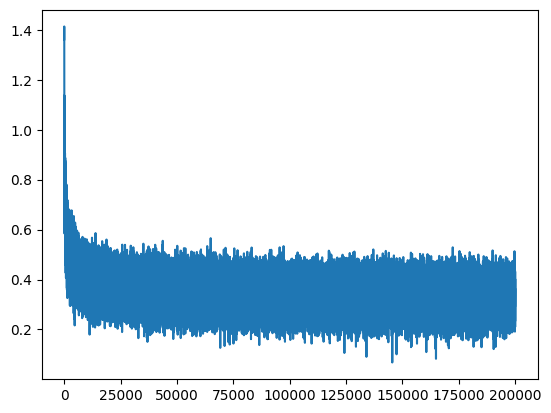

In [57]:
plt.plot(stepi, lossi)

In [58]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1388, grad_fn=<NllLossBackward0>)

In [59]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4829, grad_fn=<NllLossBackward0>)

In [61]:
g = torch.Generator().manual_seed(2147483647+10)

for _ in range(20):
  out =[]
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim = 1)
    ix = torch.multinomial(probs, num_samples = 1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print("".join(itos[i] for i in out))

mora.
mayah.
meel.
mahlyla.
temurstendrajo.
adelyn.
elingslynnelle.
emmero.
aaraylyn.
malyra.
nosaldorgiaira.
sten.
joselynn.
gin.
coluwa.
geder.
yaque.
elsy.
majouston.
mahylina.
